tasks:  
take colour colour plots produced and see how RMS survey cuts would affect them

RMS colour/colour cuts only give the simulation as an MYSO is significant smoothing is applied to the spectra (~7.5+ sigma width on the gaussian smoothing) this is because the RMS criteria expect a smoothly increasing flux from 1-100 microns (F8\<F14\<F21).  
This is compounded by the strong 10 micron absorbtion feature seen in the SEDs but smoothing over a significant range gives back a flux smoothing increasing with wavelength for the blue half of the SED.  

Changing the binning method from averaging the channels which fall inside the stated widths of the bins (as was done perviously) to convolving the spectrum with a gaussian with FWHM equal to the given bin widths then taking the value of the convolved spectrum at the channel centre gives much better agreement with the RMS cuts.

Now using seaborn package for plotting (import seaborn) figures look sooo much nicer

Populating the interactive namespace from numpy and matplotlib


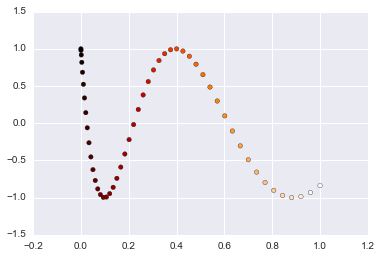

In [7]:
import seaborn
%pylab inline
scatter(linspace(0,1)**2, cos(linspace(0,10)), c=linspace(0,1), cmap=cm.gist_heat)

Looking into doing molecular emission maps now.  Using options:  
constantabundance T  
molAbundance 1.0e-6  
distance 1000.  
moleculefile 13co.mol  
stateq T  
isinlte T  
dongstep T  
plotlevels T  
!setupMolecularLteOnly T  
quasi T  
!usedust T  
!densitysubsample T

isinlte is just to start atoms in LTE rather than the ground state, to enfore LTE conditions setupMolecularLteOnly is used. stateq T is needed even if you're not calculating the statistical equilibrium as it allocates the levels (false to this is only used when reloading a calculation that has previously had the satisitical equilibrium calculated).  

now using setmaxlevel 8 (for j=3-2) meaning level fluctutions in the J=8 level or higher are ingnored for convergence

LTE emission maps look dodgey

Goddi2014 observed ammonia inversion transistions of 6,6 7,7 9,9 10,10, 12,12 13,13 14,14 at frequencies between 25 and 35 GHz.  
of these only the 6,6 has molecular coefficients making it possible to not nLTE line RT for it.  
All the lines are seen im absorption with 6,6 being the strongest with a peak flux density of -236mJy with a beam size of .245" and RMS of 1.3 mJy  
Hyperfine satalite lines (not included in the lamda datafiles) are seen in the 6,6 and 7,7  


Mayen-Gijon2014 also used the VLA to observe ammonia transitions but looked at the 2,2 3,3 4,4 5,5 and 6,6 in a different hot molecular core, detection infall signatures  

beltran2011 used sma and iram to look at a selection of lines in a HMC including detections of <sup>13</sup>CS 5-4; HNCO 10,0,10-9,0,9; OCS 19-18; H<sub>2</sub><sup>13</sup>CO 3,1,2-2,1,1 and various CH<sub>3</sub>CN lines


Marseille2011 looks at single dish observations of HDO H<sub>2</sub> <sup>18</sup>O and SO<sub>2</sub>

lots of studies (e.g keping2012, sana2014, beltran2011) use CO 2-1 to map outflows from hot molecular cores.  

CH<sub>3</sub>CN is the go-to thermometer for HMC/hot cores. However the chemistry can be a little awkward. Most chemical models suggest it is formed when organics are liberated from grain mantles at 100-300K, But they also require 10<sup>4</sup>-10<sup>5</sup> years to form the CH<sub>3</sub>CN

<matplotlib.colorbar.Colorbar instance at 0x10ccb2ab8>

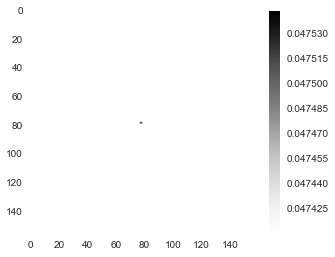

In [12]:
import pyfits as P
imshow(P.getdata('/Users/tdouglas/intensity_C13O_0410.fits')[10,50:-50,50:-50])
colorbar()

shows only tiny variation in the centre and low emission everywhere, currently running full non-LTE calcs but they are VERY slow, 24h 10nodes was insufficient to do one.  

in fact nLTE calculations seem to be broken giving a "Error: j=0 (no intersection???) in amr_mod::distanceToCellBoundary." error when running

looking at the SEDs there's a nice feature in the pole on ones where some of the colour/colour ratios spike at the time of outflow launching

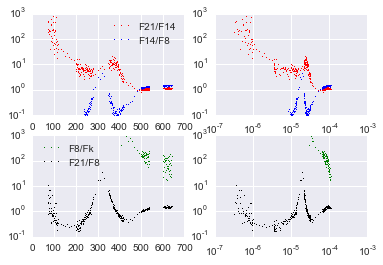

In [14]:
Image(filename='colour-colour-ratios_0deg.png')

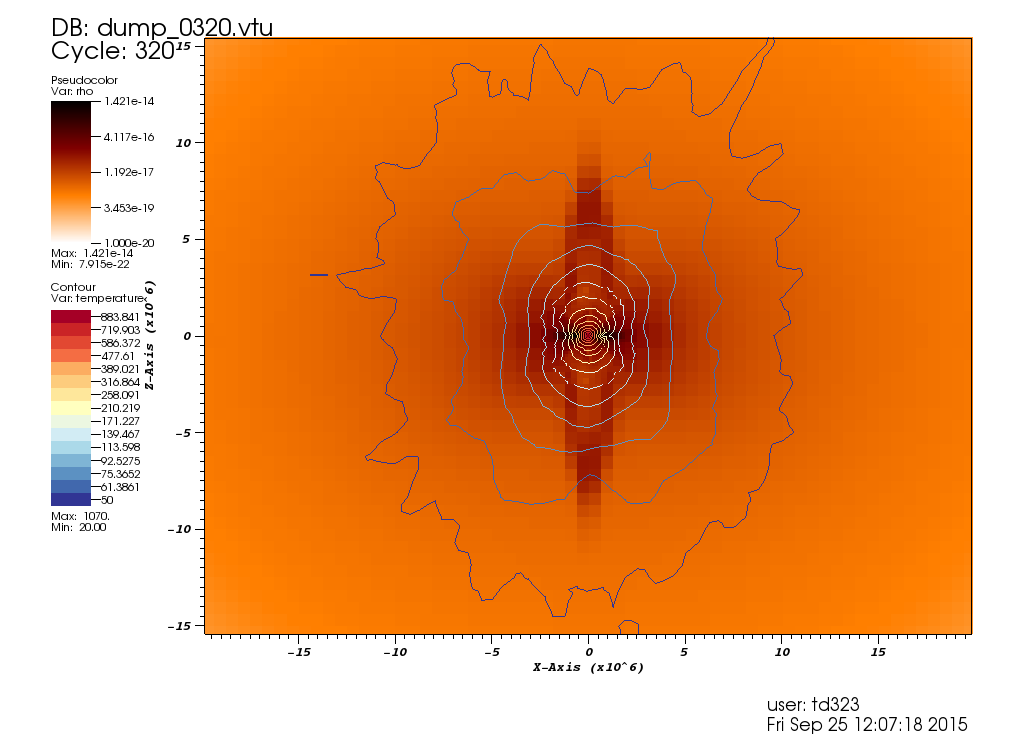

In [13]:
from IPython.display import Image
Image(filename='outflowLaunch.png')

Changed From convolving with a gaussian to using the relative spectral responce of the MSX band (taken from egan & price 1999).  These are tabulated at much smaller frequency spacing that we have for the SED, so we take each of the points for which a value is given and contruct a linear interpolator and user the interpolated respose for the band at each frequency of the SED. The are then summed and divided by the stated width of the band to give the value.